In this guided project, we're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway.
<br>
**The goal** of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

In [1]:
import pandas as pd
import numpy as np
metro = pd.read_csv('C:/Users/Пользователь/Desktop/data science/dataquest/projects/data visualization fund/Metro_Interstate_Traffic_Volume.csv', encoding='Latin-1')

In [2]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

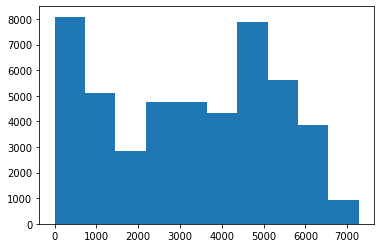

In [6]:
plt.hist(metro['traffic_volume'])
plt.show()

In [7]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Previously, we analyzed the distribution of traffic_volume and found the following:

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 25% of the time, the traffic volume was four times as much (4,933 cars or more).
This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.


We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)


In [8]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [9]:
metro['date_time'].dt.hour.head(20)

0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
Name: date_time, dtype: int64

In [10]:
daytime = metro[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]

In [11]:
daytime.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [12]:
nighttime = metro[~((metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19))]

In [13]:
nighttime.head(20)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
10,None,290.97,0.0,0.0,20,Clouds,few clouds,2012-10-02 19:00:00,3539
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
16,None,283.47,0.0,0.0,1,Clear,sky is clear,2012-10-03 01:00:00,321
17,None,281.18,0.0,0.0,1,Clear,sky is clear,2012-10-03 02:00:00,273
18,None,281.09,0.0,0.0,1,Clear,sky is clear,2012-10-03 03:00:00,367
19,None,279.53,0.0,0.0,1,Clear,sky is clear,2012-10-03 04:00:00,814


Previously, we divided the dataset into two parts:
<br>
Daytime data: hours from 7 AM to 7 PM (12 hours)
<br>
Nighttime data: hours from 7 PM to 7 AM (12 hours)
<br>
Now we're going to compare the traffic volume at night and during day.


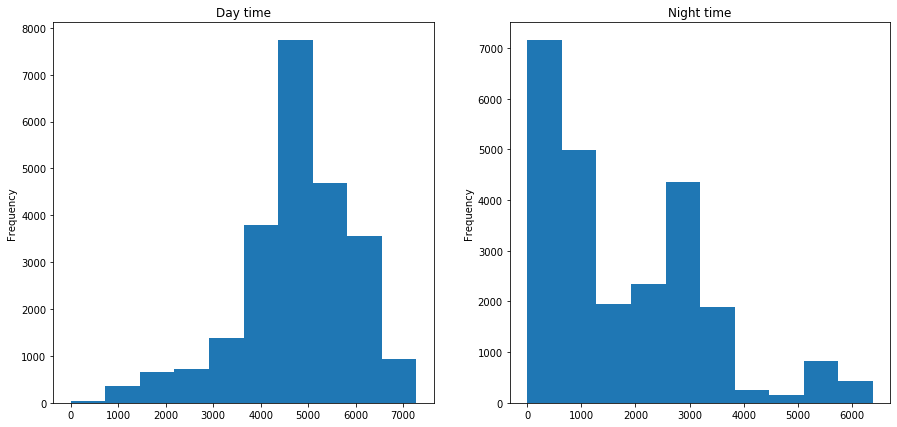

In [14]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
daytime['traffic_volume'].plot.hist()
plt.title('Day time')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
nighttime['traffic_volume'].plot.hist()
plt.title('Night time')
plt.ylabel('Frequency')
plt.show()

In [15]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [16]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Previously, we determined that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward. One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.
<br>
We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
<br>
Month
<br>
Day of the week
<br>
Time of day


In [17]:
daytime['month'] = daytime['date_time'].dt.month

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
daytime.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10


In [21]:
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

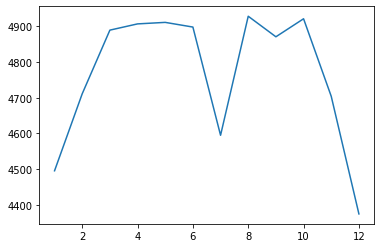

In [24]:
plt.plot(by_month['traffic_volume'])
plt.show()

In the previous screen, we generated a line plot showing how the traffic volume changed each month on average.
<br>
We'll now continue with building line plots for another time unit: day of the week.


In [25]:
daytime['dayoftheweek'] = daytime['date_time'].dt.dayofweek
by_dayoftheweek = daytime.groupby('dayoftheweek').mean()


C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
by_dayoftheweek['traffic_volume']

dayoftheweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

0 is Monday, 6 is Sunday

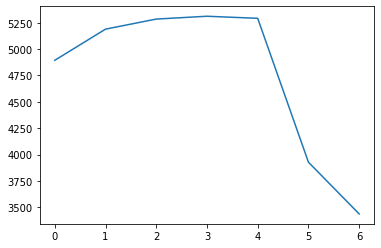

In [28]:
plt.plot(by_dayoftheweek['traffic_volume'])
plt.show()


On the previous screen, we found that the traffic volume is significantly heavier on business days compared to the weekends.
<br>
We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.


In [29]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayoftheweek'] <= 4]
weekends = daytime.copy()[daytime['dayoftheweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekends = weekends.groupby('hour').mean()


C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


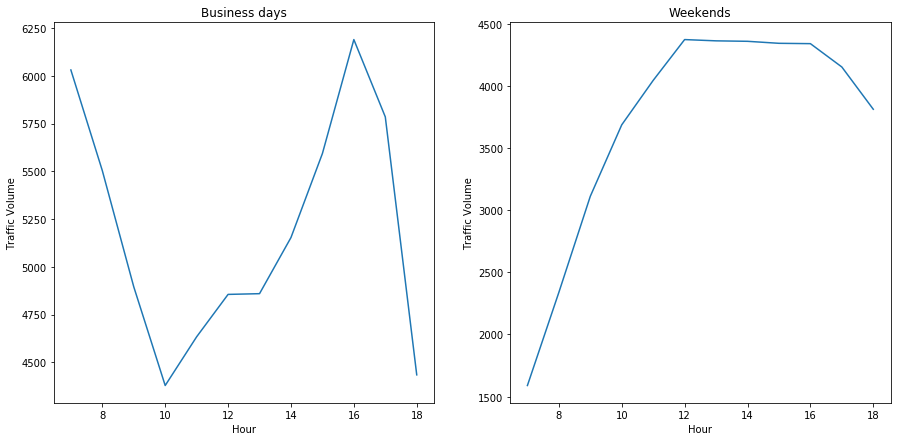

In [31]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business days')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekends['traffic_volume'])
plt.title('Weekends')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.show()

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:
<br>
The traffic is usually heavier during warm months **(March–October)** compared to cold months (November–February).
<br>
The traffic is usually heavier on business days compared to weekends.
<br>
On business days, the rush hours are around **7 and 16**.
<br>
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.



To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.
<br>
We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by weather_main and weather_description while using the mean as an aggregate function.


In [32]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()


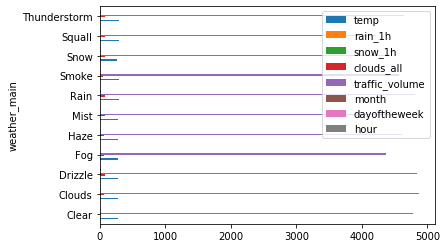

In [33]:
by_weather_main.plot.barh()
plt.show()

<Figure size 720x8640 with 0 Axes>

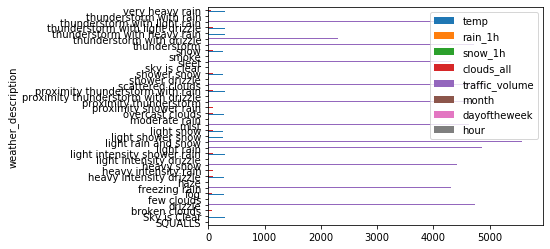

In [51]:
plt.figure(figsize=(10,120))
by_weather_description.plot.barh()
plt.show()

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
<br>
Time indicators:
<br>
The traffic is usually heavier during warm months **(March–October)** compared to cold months (November–February).
<br>
The traffic is usually heavier on **business days** compared to the weekends.
<br>
On business days, the rush hours are around **7 and 16**.
<br>
Weather indicators:
<br>
**Shower snow
<br>
Light rain and snow
<br>
Proximity thunderstorm with drizzle**
